# Regresión Lineal: Costo de un Incidente de Seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineas aplicada a un caso de uso sencillo, relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria 

# 1.- Generación del DataSet


In [1]:
 import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

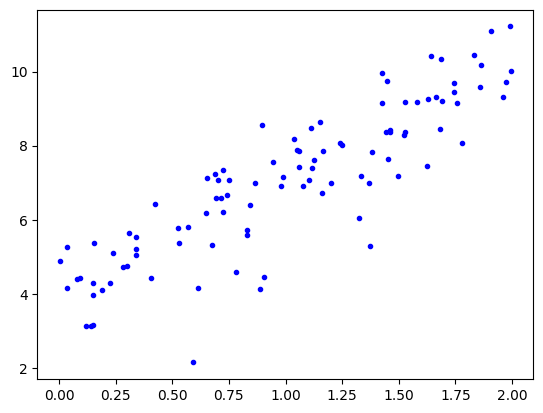

In [3]:
plt.plot(X, y, "b.")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

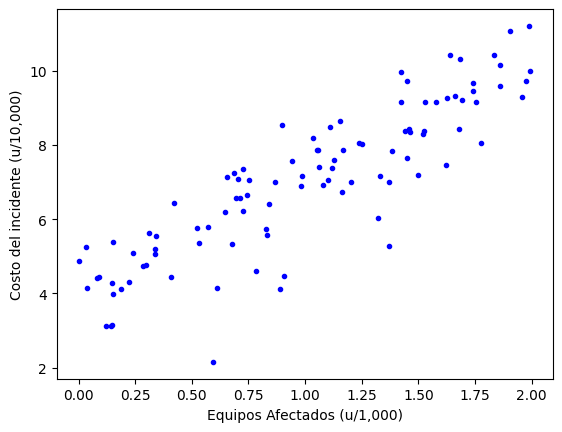

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show

# 3.- Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costos': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costos
0,0.592740,2.153748
1,0.724594,7.353717
2,0.531708,5.368819
3,1.051023,7.871950
4,0.339388,5.204015
5,0.408188,4.435865
6,1.755653,9.151965
7,1.741610,9.451131
8,1.626893,9.260160
9,0.676515,5.333810


In [7]:
# Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')

# Escalado del Costo 
df['Costos'] = df['Costos'] * 10000
df['Costos'] = df['Costos'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costos
0,592,21537
1,724,73537
2,531,53688
3,1051,78719
4,339,52040
5,408,44358
6,1755,91519
7,1741,94511
8,1626,92601
9,676,53338


<function matplotlib.pyplot.show(close=None, block=None)>

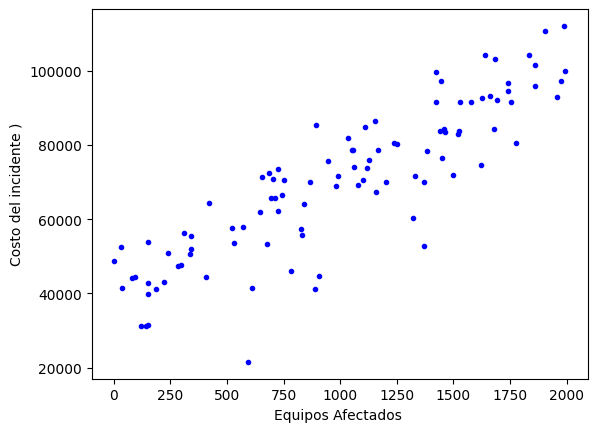

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costos'], "b.")
plt.xlabel("Equipos Afectados ")
plt.ylabel("Costo del incidente )")
plt.show

# 4.- Construcción del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construcción del modelo y ajuste de la función de hipotesis 
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costos'].values)


LinearRegression()

In [11]:
# Parametro Tetha 0
lin_reg.intercept_


np.float64(38855.978801556164)

In [12]:
#Parámetro Tetha 1
lin_reg.coef_

array([31.17553136])

In [13]:
# Predicción para el valor minimo y máximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)


<function matplotlib.pyplot.show(close=None, block=None)>

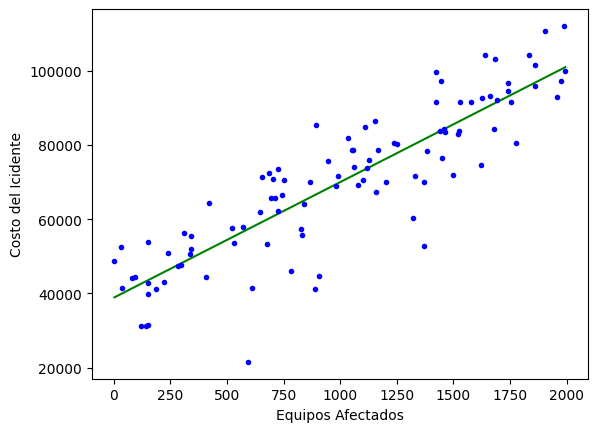

In [14]:
# Representación gráfica de la función de hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costos'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Icidente")
plt.show

# 5.- Predicción de nuevos ejemplos

In [15]:
x_new = np.array([[2700]]) #Número de equipos afectados.
# Predicción del costo que tendría el incidente
Costos = lin_reg.predict(x_new)
print("El costo del incidente sería de: $", int(Costos[0]))

El costo del incidente sería de: $ 123029


<function matplotlib.pyplot.show(close=None, block=None)>

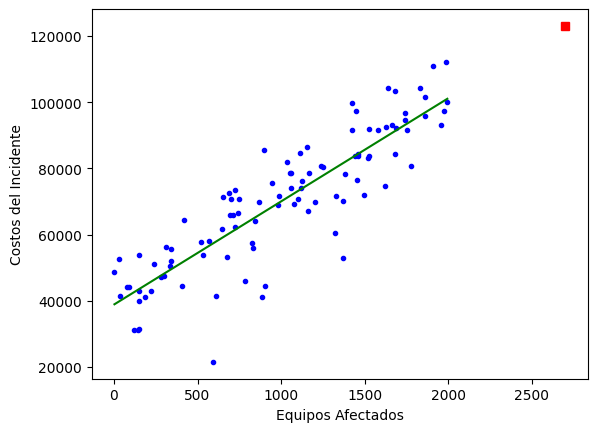

In [16]:
plt.plot(df['No_Equipos_Afectados'], df['Costos'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costos, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costos del Incidente")
plt.show